# Question 1
Compute the Hubs and authority weights for the following graph. Verify the consistency of results obtained with the Custom Implementation and inbuilt HITS Algorithm function using k=4

### 1.1 Custom implementation

In [1]:
import math
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
k = 4

In [3]:
vertices_names_1 = ['A', 'B', 'C', 'D','E']
num_vertices_1 = 5

In [4]:
adjacency_matrix_1 = [
    [1, 0, 0, 0, 0],
    [1, 0, 1, 0, 1],
    [1, 0, 0, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 1]
]

In [5]:
outbound_vertices_1 = [[] for _ in range(num_vertices_1)]

for i in range(num_vertices_1) :
    for j in range(num_vertices_1) :
        if adjacency_matrix_1[i][j] == 1 :
            outbound_vertices_1[i].append(j)

outbound_vertices_1

[[0], [0, 2, 4], [0, 3, 4], [0], [0, 4]]

In [6]:
inbound_vertices_1 = [[] for _ in range(num_vertices_1)]

for i in range(num_vertices_1) :
    for j in range(num_vertices_1) :
        if adjacency_matrix_1[j][i] == 1 :
            inbound_vertices_1[i].append(j)

inbound_vertices_1

[[0, 1, 2, 3, 4], [], [1], [2], [1, 2, 4]]

In [7]:
authority_scores_1 = [1] * num_vertices_1
hub_scores_1 = [1] * num_vertices_1

In [8]:
for itr in range(k) :
    old_authority_scores = authority_scores_1[:]
    old_hub_scores = hub_scores_1[:]
    for i in range(num_vertices_1) :
        authority_scores_1[i] = sum([old_hub_scores[j] for j in inbound_vertices_1[i]])
        hub_scores_1[i] = sum([old_authority_scores[j] for j in outbound_vertices_1[i]])
    a_normal = math.sqrt(sum([i**2 for i in authority_scores_1]))
    h_normal = math.sqrt(sum([i**2 for i in hub_scores_1]))
    for i in range(num_vertices_1) :
        authority_scores_1[i] = authority_scores_1[i] / a_normal
        hub_scores_1[i] = hub_scores_1[i] / h_normal

In [9]:
print(f"The Authority scores of the nodes after {k} iterations : ")
for i in range(num_vertices_1) :
    print(vertices_names_1[i], " : ", authority_scores_1[i])

The Authority scores of the nodes after 4 iterations : 
A  :  0.7668945054590078
B  :  0.0
C  :  0.2013098076829896
D  :  0.2013098076829896
E  :  0.5751708790942559


In [10]:
print(f"The Hub scores of the nodes after {k} iterations : ")
for i in range(num_vertices_1) :
    print(vertices_names_1[i], " : ", hub_scores_1[i])

The Hub scores of the nodes after 4 iterations : 
A  :  0.28010687597551287
B  :  0.5524330053961504
C  :  0.5524330053961504
D  :  0.28010687597551287
E  :  0.4824062864022721


### 1.2 Inbuilt HITS algorithm

In [11]:
graph_1 = nx.DiGraph()

In [12]:
graph_1.add_nodes_from(vertices_names_1)

In [13]:
graph_1.add_edges_from([('A','A'),('B','A'),('B','C'),('B','E'),('C','A'),('C','D'),('C','E'),('D','A'),('E','A'),('E','E')])

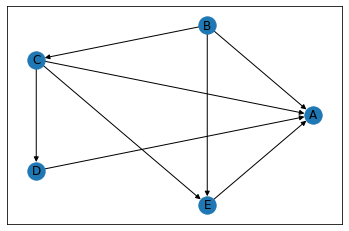

In [14]:
nx.draw_networkx(graph_1, pos=nx.circular_layout(graph_1), arrows=True, with_labels=True)
plt.show()

In [15]:
hub_scores_networkx_1, authority_scores_networkx_1 = nx.hits(graph_1, normalized = True)

In [16]:
print("The Authority scores of the nodes using Networkx library : ")
for k, v in authority_scores_networkx_1.items() :
    print(k, " : ", v)

The Authority scores of the nodes using Networkx library : 
A  :  0.4428026090460903
B  :  0.0
C  :  0.11439478287185582
D  :  0.11439478287185582
E  :  0.328407825210198


In [17]:
print("The Hub scores of the nodes using Networkx library : ")
for k, v in hub_scores_networkx_1.items() :
    print(k, " : ", v)

The Hub scores of the nodes using Networkx library : 
A  :  0.1291713067109878
B  :  0.2583426131407536
C  :  0.2583426131407536
D  :  0.1291713067109878
E  :  0.22497216029651732
